#### Sources: Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow, 2nd Edition by Aurelien Geron Copyright 2019 Kiwisoft S.A.S., 978-1-492-03264-9

## Linear Regression
### equation of a line: y = theta0*x0 + theta1*x1 ... + thetaN*xN

### x0 to xN x0 always equal to 1

In [1]:
#generate some linear looking data
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)
# lets now find the equation of a line
X_b = np.c_[np.ones((100, 1)), X]
# dot gives us the dot product of two arrays
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.90743732],
       [3.2116676 ]])

### if you notice it isnt exactly the original equation of y = 4 + 3x, we got instead y= 4.15 + 2.9x but this happened because of the added noise

### now lets do linear regression from scikit-Learn

In [2]:
from sklearn.linear_model import LinearRegression
X_new = np.array([[0], [2]])
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 3.90743732],
       [10.33077252]])

In [3]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.90743732],
       [3.2116676 ]])

In [4]:
np.linalg.pinv(X_b).dot(y)

array([[3.90743732],
       [3.2116676 ]])

### Stochastic Gradient Descent
#### Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based on that single instance

In [5]:
n_epochs = 50
t0, t1 = 5, 50
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta *gradients
        print(theta)
        

[[1.04073489]
 [0.35938644]]
[[1.85938909]
 [0.64702877]]
[[2.95093224]
 [2.32183921]]
[[3.19390492]
 [2.49044093]]
[[3.03006918]
 [2.47341754]]
[[3.70034738]
 [3.10687867]]
[[3.57483877]
 [3.05809983]]
[[3.6486043]
 [3.1949782]]
[[3.80107691]
 [3.40272337]]
[[3.86204451]
 [3.50909259]]
[[3.89777564]
 [3.51788769]]
[[3.90233582]
 [3.51947626]]
[[4.19679754]
 [3.79776378]]
[[4.22871094]
 [3.8024864 ]]
[[4.09551823]
 [3.77043478]]
[[3.80023756]
 [3.73975357]]
[[4.06078044]
 [3.98598535]]
[[3.86953832]
 [3.74319835]]
[[3.68241209]
 [3.44739174]]
[[3.56396961]
 [3.40135914]]
[[3.45346538]
 [3.1899405 ]]
[[3.7187928 ]
 [3.44911283]]
[[3.81408952]
 [3.51909044]]
[[3.9890559 ]
 [3.76980579]]
[[3.7956511 ]
 [3.43706222]]
[[3.85404016]
 [3.53977651]]
[[3.63642441]
 [3.5171651 ]]
[[3.65658889]
 [3.54465217]]
[[3.70355996]
 [3.56072454]]
[[3.74546543]
 [3.61782107]]
[[3.49858694]
 [3.20414173]]
[[3.4930693 ]
 [3.19627018]]
[[3.59301376]
 [3.34685283]]
[[3.45213007]
 [3.27983683]]
[[3.48459816]
 [

 [3.37529251]]
[[3.68306098]
 [3.32099754]]
[[3.69790094]
 [3.34688859]]
[[3.69322472]
 [3.3411292 ]]
[[3.68791262]
 [3.33127214]]
[[3.74059557]
 [3.38106132]]
[[3.74337079]
 [3.38585659]]
[[3.72317467]
 [3.37800738]]
[[3.71039143]
 [3.37259065]]
[[3.69512874]
 [3.37208248]]
[[3.69930939]
 [3.37930616]]
[[3.72832675]
 [3.40349967]]
[[3.70537145]
 [3.38081294]]
[[3.68638925]
 [3.37343552]]
[[3.66704535]
 [3.36624713]]
[[3.68213888]
 [3.39393289]]
[[3.71093556]
 [3.4179424 ]]
[[3.65267325]
 [3.30915436]]
[[3.64750081]
 [3.30398257]]
[[3.64500759]
 [3.29935617]]
[[3.64374647]
 [3.29716587]]
[[3.65557374]
 [3.31498558]]
[[3.66575583]
 [3.31846965]]
[[3.67841906]
 [3.32041865]]
[[3.71061492]
 [3.32540156]]
[[3.69304459]
 [3.2917857 ]]
[[3.68229021]
 [3.28722867]]
[[3.67975846]
 [3.28253079]]
[[3.70992241]
 [3.30768028]]
[[3.72331376]
 [3.3260954 ]]
[[3.73068669]
 [3.33614575]]
[[3.74051377]
 [3.3395986 ]]
[[3.75007248]
 [3.34295715]]
[[3.74482135]
 [3.33383704]]
[[3.72569892]
 [3.31088535]]

 [3.3069767 ]]
[[3.8955195 ]
 [3.30755219]]
[[3.89811545]
 [3.30819118]]
[[3.88037916]
 [3.29682262]]
[[3.88702638]
 [3.29780629]]
[[3.8833832 ]
 [3.29331922]]
[[3.88257208]
 [3.29314268]]
[[3.88753576]
 [3.29996849]]
[[3.89074435]
 [3.30357005]]
[[3.89626663]
 [3.3110942 ]]
[[3.9073478 ]
 [3.31483263]]
[[3.89758663]
 [3.3027377 ]]
[[3.89523963]
 [3.30088899]]
[[3.89812894]
 [3.30524221]]
[[3.89159042]
 [3.29591425]]
[[3.89891823]
 [3.30744847]]
[[3.87841475]
 [3.30393874]]
[[3.89191611]
 [3.30602833]]
[[3.90416756]
 [3.31624309]]
[[3.90904089]
 [3.3230363 ]]
[[3.89760921]
 [3.31878817]]
[[3.90212538]
 [3.32666747]]
[[3.9083527]
 [3.327589 ]]
[[3.91406823]
 [3.32884876]]
[[3.90148774]
 [3.3066185 ]]
[[3.91162346]
 [3.3168148 ]]
[[3.90110337]
 [3.29668759]]
[[3.90160203]
 [3.29717922]]
[[3.89777345]
 [3.29007495]]
[[3.89421524]
 [3.28655073]]
[[3.90553868]
 [3.30338603]]
[[3.91215155]
 [3.30824194]]
[[3.88977056]
 [3.27934836]]
[[3.90208743]
 [3.28961768]]
[[3.89824534]
 [3.28701357]]
[

 [3.18399139]]
[[3.88226942]
 [3.19256046]]
[[3.89367496]
 [3.21057028]]
[[3.8883197 ]
 [3.20830106]]
[[3.88725959]
 [3.20746603]]
[[3.88197768]
 [3.20522789]]
[[3.8809923 ]
 [3.20445171]]
[[3.86190592]
 [3.16881341]]
[[3.84345816]
 [3.15975605]]
[[3.84333292]
 [3.15959705]]
[[3.85910723]
 [3.17486539]]
[[3.86937576]
 [3.19013229]]
[[3.87826274]
 [3.19907238]]
[[3.87957393]
 [3.19952914]]
[[3.86401023]
 [3.17943661]]
[[3.87120987]
 [3.19076907]]
[[3.87422726]
 [3.1948822 ]]
[[3.87251318]
 [3.1931845 ]]
[[3.87038179]
 [3.19173988]]
[[3.86958999]
 [3.19111619]]
[[3.87394645]
 [3.19413638]]
[[3.89610955]
 [3.19780065]]
[[3.90971367]
 [3.21729447]]
[[3.90954442]
 [3.21702097]]
[[3.91053587]
 [3.21736634]]
[[3.91363662]
 [3.22013222]]
[[3.90818556]
 [3.21782241]]
[[3.90674075]
 [3.21531308]]
[[3.90916445]
 [3.21861692]]
[[3.90144274]
 [3.20497235]]
[[3.91290643]
 [3.22171423]]
[[3.9242423 ]
 [3.22439897]]
[[3.92998878]
 [3.23414422]]
[[3.93161111]
 [3.23469934]]
[[3.93961194]
 [3.23739857]]

 [3.28296996]]
[[3.90133736]
 [3.27720926]]
[[3.90295462]
 [3.27964594]]
[[3.89499904]
 [3.27022299]]
[[3.89192675]
 [3.26536636]]
[[3.8791104 ]
 [3.25907387]]
[[3.87358594]
 [3.25361405]]
[[3.86032746]
 [3.22885765]]
[[3.86265754]
 [3.2309361 ]]
[[3.86356453]
 [3.23125205]]
[[3.86586212]
 [3.23330151]]
[[3.8676017]
 [3.2356728]]
[[3.86974536]
 [3.23890259]]
[[3.86624739]
 [3.23742037]]
[[3.87219298]
 [3.24827491]]
[[3.87081246]
 [3.24657462]]
[[3.8788415 ]
 [3.25722013]]
[[3.86892586]
 [3.25061562]]
[[3.87651677]
 [3.2617016 ]]
[[3.8785808 ]
 [3.26354272]]
[[3.88417448]
 [3.27375479]]
[[3.8832954 ]
 [3.27370051]]
[[3.87319029]
 [3.27197075]]
[[3.86764642]
 [3.2621745 ]]
[[3.8774598 ]
 [3.27167311]]
[[3.88084607]
 [3.27788447]]
[[3.88932438]
 [3.28514604]]
[[3.89254591]
 [3.28562277]]
[[3.88697664]
 [3.27702327]]
[[3.87827093]
 [3.26445689]]
[[3.88435355]
 [3.27042409]]
[[3.89117538]
 [3.28119604]]
[[3.88807605]
 [3.27629666]]
[[3.88644057]
 [3.27326189]]
[[3.88595851]
 [3.27248288]]
[

 [3.23278061]]
[[3.84394889]
 [3.23885494]]
[[3.85419571]
 [3.24597894]]
[[3.857355  ]
 [3.25177396]]
[[3.85819035]
 [3.25187272]]
[[3.85807512]
 [3.25168652]]
[[3.85868824]
 [3.252291  ]]
[[3.85765677]
 [3.25037703]]
[[3.86744783]
 [3.25963028]]
[[3.86391362]
 [3.25525109]]
[[3.86374718]
 [3.25498212]]
[[3.85542939]
 [3.25347287]]
[[3.85354695]
 [3.25023422]]
[[3.85930489]
 [3.25112537]]
[[3.86199534]
 [3.25171837]]
[[3.86457801]
 [3.2562243 ]]
[[3.86513791]
 [3.25677632]]
[[3.86421472]
 [3.25517293]]
[[3.86939076]
 [3.26025075]]
[[3.87903585]
 [3.26936605]]
[[3.87825988]
 [3.26793307]]
[[3.87750854]
 [3.26734124]]
[[3.8897767 ]
 [3.26936956]]
[[3.89422772]
 [3.27384717]]
[[3.88592377]
 [3.26831616]]
[[3.88560621]
 [3.26824705]]
[[3.88350219]
 [3.26769006]]
[[3.87515503]
 [3.26626122]]
[[3.87761951]
 [3.2696966 ]]
[[3.87303781]
 [3.26160053]]
[[3.87919659]
 [3.27059499]]
[[3.88001271]
 [3.27069079]]
[[3.87354004]
 [3.26761185]]
[[3.87599768]
 [3.2710377 ]]
[[3.87357267]
 [3.26720428]]

 [3.29913184]]
[[3.86385944]
 [3.29558743]]
[[3.86567212]
 [3.29808014]]
[[3.86662693]
 [3.29840685]]
[[3.86716178]
 [3.29859317]]
[[3.86099591]
 [3.2882614 ]]
[[3.85714926]
 [3.28683195]]
[[3.86571279]
 [3.29278566]]
[[3.8620372 ]
 [3.28837404]]
[[3.86280207]
 [3.28846383]]
[[3.86733828]
 [3.29224593]]
[[3.86024648]
 [3.2875223 ]]
[[3.8626155 ]
 [3.29186776]]
[[3.85888155]
 [3.28606371]]
[[3.86075677]
 [3.28864242]]
[[3.85779025]
 [3.28428145]]
[[3.85469212]
 [3.2804426 ]]
[[3.86324911]
 [3.28639177]]
[[3.86756457]
 [3.29062534]]
[[3.87443441]
 [3.29727482]]
[[3.87284325]
 [3.29483341]]
[[3.8672551 ]
 [3.29217522]]
[[3.86850275]
 [3.2926136 ]]
[[3.86453147]
 [3.28868878]]
[[3.85853354]
 [3.28484424]]
[[3.8608006 ]
 [3.28534392]]
[[3.86317012]
 [3.28969028]]
[[3.86616084]
 [3.29283205]]
[[3.86555713]
 [3.29189694]]
[[3.86765074]
 [3.2947495 ]]
[[3.86703007]
 [3.29378811]]
[[3.86337767]
 [3.28940431]]
[[3.86786958]
 [3.29314949]]
[[3.87321361]
 [3.29836955]]
[[3.86709538]
 [3.2881176 ]]

 [3.28960546]]
[[3.83937721]
 [3.28853601]]
[[3.8345428 ]
 [3.28623636]]
[[3.83138559]
 [3.28500931]]
[[3.82461978]
 [3.27627474]]
[[3.82711366]
 [3.28050402]]
[[3.82837416]
 [3.28094691]]
[[3.82503127]
 [3.27764313]]
[[3.81987111]
 [3.26899657]]
[[3.82363578]
 [3.27026664]]
[[3.82993443]
 [3.27636326]]
[[3.8317262 ]
 [3.27670066]]
[[3.83937397]
 [3.2820177 ]]
[[3.84058702]
 [3.28244391]]
[[3.84004932]
 [3.28145094]]
[[3.84099583]
 [3.28177482]]
[[3.83927017]
 [3.27931295]]
[[3.83394599]
 [3.27162771]]
[[3.82940859]
 [3.2683508 ]]
[[3.8349374 ]
 [3.27308616]]
[[3.83735779]
 [3.27486348]]
[[3.83664915]
 [3.27363273]]
[[3.83657536]
 [3.27361667]]
[[3.83644226]
 [3.27340158]]
[[3.83840729]
 [3.27614073]]
[[3.84118243]
 [3.27905604]]
[[3.84349794]
 [3.28312934]]
[[3.84567512]
 [3.28345152]]
[[3.84666337]
 [3.28369478]]
[[3.84616359]
 [3.2833011 ]]
[[3.84523657]
 [3.28158094]]
[[3.84402226]
 [3.27971776]]
[[3.84766136]
 [3.28094547]]
[[3.84456051]
 [3.27722368]]
[[3.84242241]
 [3.27631769]]

 [3.29504834]]
[[3.86402447]
 [3.29419678]]
[[3.86474062]
 [3.295173  ]]
[[3.8670174 ]
 [3.29771307]]
[[3.86743368]
 [3.29843236]]
[[3.86817443]
 [3.29868583]]
[[3.86684794]
 [3.2973595 ]]
[[3.87087378]
 [3.30323896]]
[[3.87402476]
 [3.304302  ]]
[[3.87382302]
 [3.30425809]]
[[3.86761974]
 [3.29624973]]
[[3.87164323]
 [3.30212576]]
[[3.87220682]
 [3.30219192]]
[[3.86907564]
 [3.29735707]]
[[3.87161209]
 [3.29955178]]
[[3.87321003]
 [3.30172899]]
[[3.86844491]
 [3.29867466]]
[[3.86984807]
 [3.29964743]]
[[3.87169951]
 [3.29992141]]
[[3.87994248]
 [3.30128423]]
[[3.87851738]
 [3.30090697]]
[[3.88071954]
 [3.3033638 ]]
[[3.88252668]
 [3.30654281]]
[[3.88158971]
 [3.30491548]]
[[3.88101092]
 [3.30401896]]
[[3.88193273]
 [3.30434285]]
[[3.88152296]
 [3.30368067]]
[[3.87657057]
 [3.29653208]]
[[3.87794863]
 [3.29748745]]
[[3.88165048]
 [3.3009859 ]]
[[3.87458762]
 [3.29751822]]
[[3.87630363]
 [3.29789645]]
[[3.87307947]
 [3.29219922]]
[[3.876807  ]
 [3.29572195]]
[[3.87633877]
 [3.29569304]]

 [3.30445579]]
[[3.91452914]
 [3.30252698]]
[[3.91338032]
 [3.30225053]]
[[3.9114564 ]
 [3.30143529]]
[[3.90856039]
 [3.29696356]]
[[3.90758129]
 [3.29514675]]
[[3.90360809]
 [3.29044073]]
[[3.90198631]
 [3.28787704]]
[[3.90398197]
 [3.28997349]]
[[3.90454747]
 [3.29016699]]
[[3.90363568]
 [3.2892639 ]]
[[3.90282382]
 [3.28785387]]
[[3.90408032]
 [3.29004608]]
[[3.90679932]
 [3.29096338]]
[[3.90235849]
 [3.28455321]]
[[3.89776884]
 [3.28407632]]
[[3.8983558 ]
 [3.28427716]]
[[3.89677951]
 [3.28178538]]
[[3.89851798]
 [3.28473359]]
[[3.89763965]
 [3.28386364]]
[[3.9049058 ]
 [3.28506497]]
[[3.90748066]
 [3.28765522]]
[[3.90483512]
 [3.28447991]]
[[3.90516241]
 [3.28504544]]
[[3.90375997]
 [3.2826326 ]]
[[3.90432711]
 [3.2834057 ]]
[[3.90344188]
 [3.28231542]]
[[3.90538614]
 [3.28448452]]
[[3.9032221 ]
 [3.28130324]]
[[3.90612452]
 [3.28415058]]
[[3.90501946]
 [3.28388466]]
[[3.90044277]
 [3.28340912]]
[[3.90122806]
 [3.28368504]]
[[3.89845752]
 [3.27940704]]
[[3.8969536 ]
 [3.27726152]]

 [3.2298606 ]]
[[3.92164726]
 [3.23474338]]
[[3.92128067]
 [3.2340664 ]]
[[3.92179567]
 [3.23424262]]
[[3.92208923]
 [3.23427733]]
[[3.9182443 ]
 [3.23181282]]
[[3.92205321]
 [3.2350751 ]]
[[3.9175573 ]
 [3.23208051]]
[[3.92287146]
 [3.23577513]]
[[3.92471288]
 [3.23782951]]
[[3.92422523]
 [3.23779939]]
[[3.9185024 ]
 [3.23498964]]
[[3.92096426]
 [3.23582019]]
[[3.92215915]
 [3.23746334]]
[[3.92137171]
 [3.23691693]]
[[3.92276908]
 [3.23933548]]
[[3.92321299]
 [3.24010251]]
[[3.91861225]
 [3.23926771]]
[[3.92111672]
 [3.24383999]]
[[3.91771995]
 [3.24138685]]
[[3.91526883]
 [3.23705562]]
[[3.91614654]
 [3.23783854]]
[[3.9144813 ]
 [3.23713291]]
[[3.91586382]
 [3.23901661]]
[[3.9182708 ]
 [3.24143798]]
[[3.92106644]
 [3.24376887]]
[[3.92756658]
 [3.24484355]]
[[3.92379466]
 [3.23852318]]
[[3.92547221]
 [3.24136807]]
[[3.92853563]
 [3.24620533]]
[[3.92989094]
 [3.24640589]]
[[3.92746199]
 [3.24265534]]
[[3.93080189]
 [3.24591776]]
[[3.93030079]
 [3.24588682]]
[[3.93135911]
 [3.24662051]]

 [3.22388183]]
[[3.88592439]
 [3.22361025]]
[[3.88632959]
 [3.22365782]]
[[3.88579954]
 [3.22300499]]
[[3.88382883]
 [3.21994173]]
[[3.88439886]
 [3.22013678]]
[[3.88229671]
 [3.21642218]]
[[3.88290275]
 [3.21657136]]
[[3.88701404]
 [3.22055077]]
[[3.88597505]
 [3.21906854]]
[[3.88268183]
 [3.21355028]]
[[3.88271019]
 [3.21359612]]
[[3.8834614 ]
 [3.21386006]]
[[3.88243909]
 [3.21224401]]
[[3.88079428]
 [3.21020595]]
[[3.87979386]
 [3.20994111]]
[[3.88465807]
 [3.21453814]]
[[3.8833282 ]
 [3.21341888]]
[[3.88369044]
 [3.21346171]]
[[3.87956216]
 [3.21275504]]
[[3.87616368]
 [3.21057669]]
[[3.87094173]
 [3.20082621]]
[[3.86584979]
 [3.1983262 ]]
[[3.86853243]
 [3.20095794]]
[[3.86863896]
 [3.20113008]]
[[3.86658052]
 [3.20033007]]
[[3.86564798]
 [3.19885593]]
[[3.8671231 ]
 [3.20142955]]
[[3.86554858]
 [3.19947858]]
[[3.86688316]
 [3.20131382]]
[[3.8692929 ]
 [3.20373797]]
[[3.87116705]
 [3.20668794]]
[[3.8724878 ]
 [3.20697904]]
[[3.87203917]
 [3.2064265 ]]
[[3.87300154]
 [3.20787647]]

 [3.15587807]]
[[3.87055723]
 [3.15553059]]
[[3.87320525]
 [3.1577384 ]]
[[3.87794259]
 [3.16103199]]
[[3.87528686]
 [3.15788644]]
[[3.87064229]
 [3.14921403]]
[[3.87012534]
 [3.14832465]]
[[3.8674744 ]
 [3.14641014]]
[[3.86623431]
 [3.14588467]]
[[3.86813481]
 [3.14800495]]
[[3.86967077]
 [3.1500977 ]]
[[3.86994051]
 [3.1505336 ]]
[[3.87032732]
 [3.15066835]]
[[3.86877503]
 [3.14825546]]
[[3.86959877]
 [3.1496788 ]]
[[3.8691227 ]
 [3.14935613]]
[[3.86860952]
 [3.14847324]]
[[3.87335613]
 [3.15177327]]
[[3.87466076]
 [3.15196633]]
[[3.87507607]
 [3.15201509]]
[[3.87790998]
 [3.15469329]]
[[3.87988209]
 [3.15639971]]
[[3.88145195]
 [3.15911681]]
[[3.88447015]
 [3.15983163]]
[[3.88726642]
 [3.16247426]]
[[3.88766912]
 [3.16287129]]
[[3.8838576 ]
 [3.16217969]]
[[3.88444132]
 [3.16232337]]
[[3.88277373]
 [3.16032186]]
[[3.88414204]
 [3.16184399]]
[[3.88148578]
 [3.1586978 ]]
[[3.8797795 ]
 [3.15634996]]
[[3.88100849]
 [3.15662084]]
[[3.87970327]
 [3.15412366]]
[[3.88251497]
 [3.15678088]]

In [6]:
theta

array([[3.88492865],
       [3.19515246]])

#### now we can use scikits version of sgd

In [7]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) #tol is when the loss function goes at or below we stop
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.84561582]), array([3.14049088]))

### We have covered batch gradient descent and stochastic gradient descent
#### batch gd is when we iterate over the whole set and adjust the slope accordingly using the average of the gradients
#### stochastic is when we take a random point from the set and adjust the slope off that one calculation of residual

### Mini Batch Gradient Descent
#### We will treat this situation just like batch gd but instead, we take a random subset of the data called a "mini batch"

In [8]:
'''
source: https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing
Loss function is usually a function defined on a data point, prediction and label, and measures the penalty. For example:
square loss 𝑙(𝑓(𝑥𝑖|𝜃),𝑦𝑖)=(𝑓(𝑥𝑖|𝜃)−𝑦𝑖)2, used in linear regression
hinge loss 𝑙(𝑓(𝑥𝑖|𝜃),𝑦𝑖)=max(0,1−𝑓(𝑥𝑖|𝜃)𝑦𝑖), used in SVM
0/1 loss 𝑙(𝑓(𝑥𝑖|𝜃),𝑦𝑖)=1⟺𝑓(𝑥𝑖|𝜃)≠𝑦𝑖, used in theoretical analysis and definition of accuracy
Cost function is usually more general. It might be a sum of loss functions over your training set plus some model complexity penalty (regularization). For example:
Mean Squared Error 𝑀𝑆𝐸(𝜃)=1𝑁∑𝑁𝑖=1(𝑓(𝑥𝑖|𝜃)−𝑦𝑖)2
SVM cost function 𝑆𝑉𝑀(𝜃)=‖𝜃‖2+𝐶∑𝑁𝑖=1𝜉𝑖 (there are additional constraints
'''

'\nsource: https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing\nLoss function is usually a function defined on a data point, prediction and label, and measures the penalty. For example:\nsquare loss 𝑙(𝑓(𝑥𝑖|𝜃),𝑦𝑖)=(𝑓(𝑥𝑖|𝜃)−𝑦𝑖)2, used in linear regression\nhinge loss 𝑙(𝑓(𝑥𝑖|𝜃),𝑦𝑖)=max(0,1−𝑓(𝑥𝑖|𝜃)𝑦𝑖), used in SVM\n0/1 loss 𝑙(𝑓(𝑥𝑖|𝜃),𝑦𝑖)=1⟺𝑓(𝑥𝑖|𝜃)≠𝑦𝑖, used in theoretical analysis and definition of accuracy\nCost function is usually more general. It might be a sum of loss functions over your training set plus some model complexity penalty (regularization). For example:\nMean Squared Error 𝑀𝑆𝐸(𝜃)=1𝑁∑𝑁𝑖=1(𝑓(𝑥𝑖|𝜃)−𝑦𝑖)2\nSVM cost function 𝑆𝑉𝑀(𝜃)=‖𝜃‖2+𝐶∑𝑁𝑖=1𝜉𝑖 (there are additional constraints\n'

### Polynomial Regression
#### implements a linear model to fit a nonlinear model.
#### simple way to implement this is to add powers of each feature as new features

In [9]:
#generate some nonlinear data
import matplotlib.pyplot as plt
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2+X+2+np.random.randn(m,1)
plt.figure(1, figsize=(10,6))
plt.scatter(X, y)
plt.show()

<Figure size 1000x600 with 1 Axes>

### now lets find a polynomial equation to fit this

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.02755784])

In [11]:
X_poly[0]

array([-2.02755784,  4.11099078])

### X_poly contains the original feature of X plus the square. now we can just plug these into a Linear Regression model

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg_n_poly = LinearRegression()
lin_reg_n_poly.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

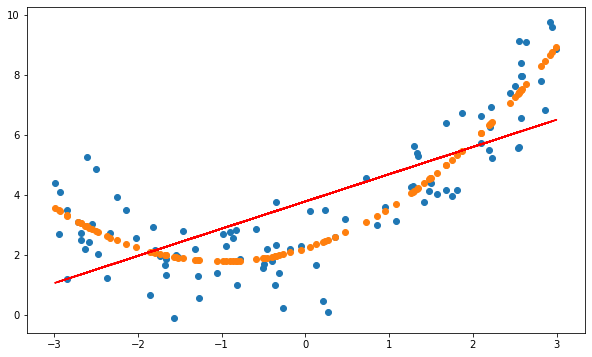

In [13]:
plt.figure(1, figsize=(10,6))
plt.scatter(X, y)
plt.scatter(X, lin_reg.predict(X_poly))
plt.plot(X, lin_reg_n_poly.predict(X), color='r')
plt.show()

### Ridge Regression
#### regularized version of linear regression. regularization tries to regularize the model by making it simpler and less complicated and most importantly, to avoid overfitting. In this case it forces the learning algorithm to fit the data but keep weights small as possible. Essentially regulate the slope. alpha value of 0 will give a flat line. 100 will give us a more sloped line

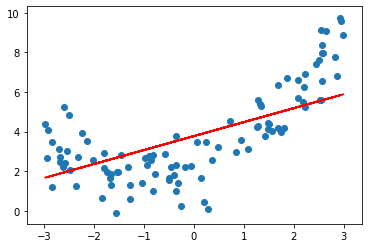

In [14]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=100, solver="cholesky")
ridge_reg.fit(X, y)
plt.plot(X, ridge_reg.predict(X), color='r')
plt.scatter(X, y)
plt.show()